# A rigorous, thorough, and high quality determination of phase transition existence and critical temperature in the 2D Ising Model

Determine the phase transition exists:
1. Mag vs. Temp
2. Sus. vs. Temp
3. Heat cap vs. Temp
4. Autocorrelation vs. Temp

Determine that the data we are taking is independent:
1. Autocorrelation as a func of lag time
2. Mag/sus/heat time series data
3. ?

Calculate critical temperature:
1. Binder cumulant
2. Finite scaling techniques??????
3. autocor?????

Do these things for various lattice sizes (can I extrapolate to infinite lattice size?). Also think about error bars/uncertainty for each method and lattice size

### Imports

In [16]:
#imports 
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import optimize
import json
import copy
from scipy.optimize import curve_fit
import math
from scipy import fft

### Lattice Algorithms

In [17]:
def initLattice(latticeSize: int, hot: bool) -> list[list[int]]:
    lattice = np.zeros((latticeSize, latticeSize))
    if hot:
        for i in range(latticeSize):
            for j in range(latticeSize):
                #pick a random spin
                spin = 0
                randomInt = random.randint(0,1)
                if(randomInt == 1):
                    spin = 1
                else:
                    spin = -1
                #set lattice site equal to the random spin    
                lattice[i][j] = spin
    else: #lattice is cold
        for i in range(latticeSize):
            for j in range(latticeSize):
                #set all lattice sites to spin up
                spin = 1
                lattice[i][j] = spin
    
    return lattice

In [18]:
# Calculate change in energy of lattice by flipping a single site (i,j)
def deltaU(i: int, j: int, lattice: list) -> float:
    '''
    This calulation requires considering neighboring sites (first term in Hamiltonian)
    Therefore, we will use periodic boundary conditions (torus)
    I would like to imlement the external field term so you can drive the system to specific states

    E1 = -spin(i,j)*sum(spin(neighbors)),     E2 = spin(i,j)*sum(spin(neighbors))
    Ediff = E2 - E1 = 2spin(i,j)*sum(neighbors) (if spin(i,j) is 1 (up))            <<<<< NO epsilon/J? unclear why, currently just implementing pseudocode exactly as written

    In the mean field approximation E_up = -4J*sum(spin(neighbors))/4) 

    i is vertical, j is horizontal, zero indexed
    '''

    size = len(lattice)
    # If site is in an edge, apply periodic boundary conditions
    if(i == 0):
        top = lattice[size-1,j]
    else:
        top = lattice[i-1][j]
    if(i == size-1):
        bottom = lattice[0][j]
    else:
        bottom = lattice[i+1][j]
    if(j == 0):
        left = lattice[i][size-1]
    else:
        left = lattice[i][j-1]
    if(j == size-1):
        right = lattice[i][0]
    else:
        right = lattice[i][j+1]

    #now calculate the energy difference
    Ediff = 2*lattice[i][j]*(top+bottom+left+right)
    return Ediff

In [19]:
def Metropolis(lattice, temp, iterations):
    m = []
    for iteration in range(iterations):

        if((iteration % 99 == 0) and (iteration != 0)):
            sum = 0
            for xSite in range(lattice[0].size):
                for ySite in range(lattice[0].size):
                    sum += lattice[xSite][ySite]
            m.append(abs(sum)) 

        i = random.randint(0,lattice[0].size-1)
        j = random.randint(0,lattice[0].size-1)
        Ediff = deltaU(i,j,lattice)
        #Metropolis to decide whether site should be flipped.
        if(Ediff <= 0):
            lattice[i][j] = -lattice[i][j] 
        else:
            #now only flip site according to Boltzmann factor
            boltzmannRandom = random.uniform(0,1)
            if(boltzmannRandom < np.exp(-Ediff/temp)): #Ediff must be positive so exponential is between 0 and 1
                lattice[i][j] = -lattice[i][j]

    return m

In [20]:
def MetropolisNew(lattice, temp):
    '''
    Only peform 1 Metropolis update, taking no measurements
    '''
    i = random.randint(0,len(lattice[0])-1)
    j = random.randint(0,len(lattice[0])-1)
    Ediff = deltaU(i,j,lattice)
    #Metropolis to decide whether site should be flipped.
    if(Ediff <= 0):
        lattice[i][j] = -lattice[i][j] 
    else:
        #now only flip site according to Boltzmann factor
        boltzmannRandom = random.uniform(0,1)
        if(boltzmannRandom < np.exp(-Ediff/temp)): #Ediff must be positive so exponential is between 0 and 1
            lattice[i][j] = -lattice[i][j]


**avg mag should be changed to just calculate avg mag without temp and iterations and the iterate over avg mag and temps**

In [21]:
def calcMagArr(lattice, temp, iterations):
    mArr = []
    for iteration in range(iterations):
        MetropolisNew(lattice,temp)
        if((iteration % 99 == 0) and (iteration != 0)):
            sum = 0
            for xSite in range(lattice[0].size):
                for ySite in range(lattice[0].size):
                    sum += lattice[xSite][ySite]
            mArr.append(abs(sum)) 
    
    return mArr

previous run at n=12 was 2 min 4 sec, n=24 = 2.5, 48=4.7, 64=6min58

### Observable plots
Things mentioned in the first sections go here.

0.0%
0.3%
0.5%
0.8%
1.0%
1.3%
1.5%
1.8%
2.0%
2.3%
2.5%
2.8%
3.0%
3.3%
3.5%
3.8%
4.0%
4.3%
4.5%
4.8%
5.0%
5.3%
5.5%
5.8%
6.0%
6.3%
6.5%
6.8%
7.0%
7.3%
7.5%
7.8%
8.0%
8.3%
8.5%
8.8%
9.0%
9.3%
9.5%
9.8%
10.0%
10.3%
10.5%
10.8%
11.0%
11.3%
11.5%
11.8%
12.0%
12.3%
12.5%
12.8%
13.0%
13.3%
13.5%
13.8%
14.0%
14.3%
14.5%
14.8%
15.0%
15.3%
15.5%
15.8%
16.0%
16.3%
16.5%
16.8%
17.0%
17.3%
17.5%
17.8%
18.0%
18.3%
18.5%
18.8%
19.0%
19.3%
19.5%
19.8%
20.1%
20.3%
20.6%
20.8%
21.1%
21.3%
21.6%
21.8%
22.1%
22.3%
22.6%
22.8%
23.1%
23.3%
23.6%
23.8%
24.1%
24.3%
24.6%
24.8%
25.1%
25.3%
25.6%
25.8%
26.1%
26.3%
26.6%
26.8%
27.1%
27.3%
27.6%
27.8%
28.1%
28.3%
28.6%
28.8%
29.1%
29.3%
29.6%
29.8%
30.1%
30.3%
30.6%
30.8%
31.1%
31.3%
31.6%
31.8%
32.1%
32.3%
32.6%
32.8%
33.1%
33.3%
33.6%
33.8%
34.1%
34.3%
34.6%
34.8%
35.1%
35.3%
35.6%
35.8%
36.1%
36.3%
36.6%
36.8%
37.1%
37.3%
37.6%
37.8%
38.1%
38.3%
38.6%
38.8%
39.1%
39.3%
39.6%
39.8%
40.1%
40.4%
40.6%
40.9%
41.1%
41.4%
41.6%
41.9%
42.1%
42.4%
42.6%
42.9%
43.1%
43

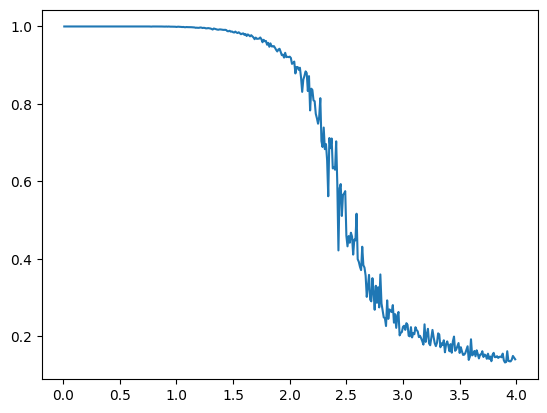

In [22]:
size = 12 #6,12,16,24,32
lattice = initLattice(size, True)

tempRange = np.flip(np.arange(0.01,4,0.01))
avgArr32 = []
for temp in tempRange:
    percent = round((tempRange[0]-temp)/tempRange[0] * 100,1)
    print("%s%%" % percent)
    mAvg = 1/(np.power(size,2))*np.average(calcMagArr(lattice, temp, 100000))
    avgArr32.append(mAvg)

avgArr32
plt.plot(tempRange, avgArr32)

The idea is to extrapolate the pesudocrti temps from sus peaks. Collapse binder cumulant data?

Need to find v from best binder cumulant collapse. ALSOM MANUALLY CHECK BY CREATING A CORRELATION FUNCTION PLOT??

In [23]:
# with open('avgArr32.txt', 'w') as filehandle:
#     json.dump(avgArr32, filehandle)

In [36]:
#Binder cumulant function
def binderCum(lattice, temp, iterations):
    m2Arr = []
    m4Arr = []
    cumArr = []
    #sum4 = 0
    for iteration in range(iterations):
        magArr = calcMagArr(lattice, temp, 500000) #already doing 10k iterations on the mag . . . and 10 on the BC call in plotting
        m2Arr = [np.power(x,2) for x in magArr]
        m4Arr = [np.power(x,4) for x in magArr]
        
        avgm2 = np.average(m2Arr)
        avgm4 = np.average(m4Arr)

        cumulant = 1 - (avgm4)/(3*np.power(avgm2,2))
        cumArr.append(cumulant)

    
    return np.average(cumArr) #IS IT CORRECT TO AVERAGE THE BINDER CUM??


0.0%
0.4%
0.8%
1.2%
1.6%
2.0%
2.4%
2.8%
3.2%
3.6%
4.0%
4.4%
4.8%
5.2%
5.6%
6.0%
6.4%
6.8%
7.2%
7.6%
8.0%
8.4%
8.8%
9.2%
9.6%
10.0%
10.4%
10.8%
11.2%
11.6%
12.0%
12.4%
12.9%
13.3%
13.7%
14.1%
14.5%
14.9%
15.3%
15.7%
16.1%
16.5%
16.9%
17.3%
17.7%
18.1%
18.5%
18.9%
19.3%
19.7%
0.0%
0.4%
0.8%
1.2%
1.6%
2.0%
2.4%
2.8%
3.2%
3.6%
4.0%
4.4%
4.8%
5.2%
5.6%
6.0%
6.4%
6.8%
7.2%
7.6%
8.0%
8.4%
8.8%
9.2%
9.6%
10.0%
10.4%
10.8%
11.2%
11.6%
12.0%
12.4%
12.9%
13.3%
13.7%
14.1%
14.5%
14.9%
15.3%
15.7%
16.1%
16.5%
16.9%
17.3%
17.7%
18.1%
18.5%
18.9%
19.3%
19.7%


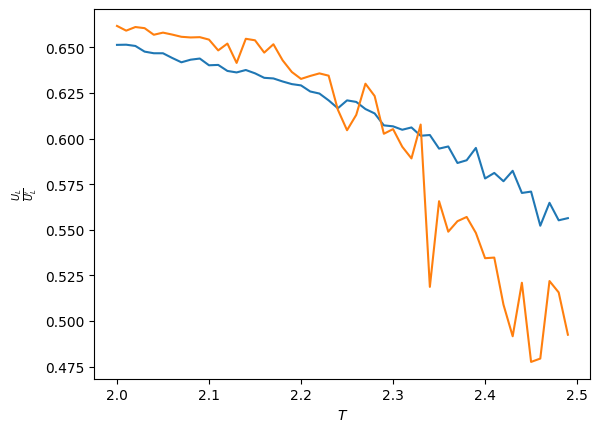

In [39]:
#Magnetization vs temperature

#L=6
lattice = initLattice(6, True)

tempRange = np.flip(np.arange(2,2.5,0.01))
avgArr12 = []
for temp in tempRange:
    percent = round((tempRange[0]-temp)/tempRange[0] * 100,1)
    print("%s%%" % percent)
    cumAvg = binderCum(lattice, temp, 1)
    avgArr12.append(cumAvg)


#L=24
lattice = initLattice(12, True)

tempRange = np.flip(np.arange(2,2.5,0.01))
avgArr24 = []
for temp in tempRange:
    percent = round((tempRange[0]-temp)/tempRange[0] * 100,1)
    print("%s%%" % percent)
    cumAvg = binderCum(lattice, temp, 1)
    avgArr24.append(cumAvg)


plt.xlabel("$T$")
plt.ylabel("$\\frac{U_L}{U_L'}$")
plt.plot(tempRange, avgArr12)
plt.plot(tempRange, avgArr24)

In [67]:
#Susceptibility function
def calcSus(lattice, temp):
    m2Arr = []


    magArr = calcMagArr(lattice, temp, 500000) #already doing 10k iterations on the mag . . . and 10 on the BC call in plotting 1000000
    m2Arr = [np.power(x,2) for x in magArr]
    
    avgm = np.average(magArr)
    avgm2 = np.average(m2Arr)

    sus = (avgm2 - np.power(avgm,2))/(temp)
      

    return sus


if this fails at 1 million iterations, we can just smooth the actual sus curve out.  

In [72]:
for size in [24,16,12,6]:
    lattice = initLattice(size, True)

    tempRange = np.flip(np.arange(0.1,4,0.01))
    susArr = []
    for temp in tempRange:
        percent = round((tempRange[0]-temp)/tempRange[0] * 100,1)
        print("%s%%" % percent)
        sus = calcSus(lattice, temp)
        susArr.append(sus)

    name = "sus%sArr.txt" % str(size)
    with open(name, 'w') as filehandle:
        json.dump(susArr, filehandle)

#plt.plot(tempRange, susArr)

0.0%
0.3%
0.5%
0.8%
1.0%
1.3%
1.5%
1.8%
2.0%
2.3%
2.5%
2.8%
3.0%
3.3%
3.5%
3.8%
4.0%
4.3%
4.5%
4.8%
5.0%
5.3%
5.5%
5.8%
6.0%
6.3%
6.5%
6.8%
7.0%
7.3%
7.5%
7.8%
8.0%
8.3%
8.5%
8.8%
9.0%
9.3%
9.5%
9.8%
10.0%
10.3%
10.5%
10.8%
11.0%
11.3%
11.5%
11.8%
12.0%
12.3%
12.5%
12.8%
13.0%
13.3%
13.5%
13.8%
14.0%
14.3%
14.5%
14.8%
15.0%
15.3%
15.5%
15.8%
16.0%
16.3%
16.5%
16.8%
17.0%
17.3%
17.5%
17.8%
18.0%
18.3%
18.5%
18.8%
19.0%
19.3%
19.5%
19.8%
20.1%
20.3%
20.6%
20.8%
21.1%
21.3%
21.6%
21.8%
22.1%
22.3%
22.6%
22.8%
23.1%
23.3%
23.6%
23.8%
24.1%
24.3%
24.6%
24.8%
25.1%
25.3%
25.6%
25.8%
26.1%
26.3%
26.6%
26.8%
27.1%
27.3%
27.6%
27.8%
28.1%
28.3%
28.6%
28.8%
29.1%
29.3%
29.6%
29.8%
30.1%
30.3%
30.6%
30.8%
31.1%
31.3%
31.6%
31.8%
32.1%
32.3%
32.6%
32.8%
33.1%
33.3%
33.6%
33.8%
34.1%
34.3%
34.6%
34.8%
35.1%
35.3%
35.6%
35.8%
36.1%
36.3%
36.6%
36.8%
37.1%
37.3%
37.6%
37.8%
38.1%
38.3%
38.6%
38.8%
39.1%
39.3%
39.6%
39.8%
40.1%
40.4%
40.6%
40.9%
41.1%
41.4%
41.6%
41.9%
42.1%
42.4%
42.6%
42.9%
43.1%
43

In [117]:
# with open('susTempRange.txt', 'w') as filehandle:
#     json.dump(list(tempRange), filehandle)

In [300]:
tempRange = np.flip(np.arange(0.1,4,0.01))

In [299]:
from numpy import loadtxt
lines6 = loadtxt("sus6Arr.txt", comments="#", delimiter=",", unpack=False)
lines12 = loadtxt("sus12Arr.txt", comments="#", delimiter=",", unpack=False)
lines16 = loadtxt("sus16Arr.txt", comments="#", delimiter=",", unpack=False)
lines24 = loadtxt("sus24Arr.txt", comments="#", delimiter=",", unpack=False)
lines32 = loadtxt("sus32Arr.txt", comments="#", delimiter=",", unpack=False)
sus6Arr = list(lines6)
sus12Arr = list(lines12)
sus16Arr = list(lines16)
sus24Arr = list(lines24)
sus32Arr = list(lines32)

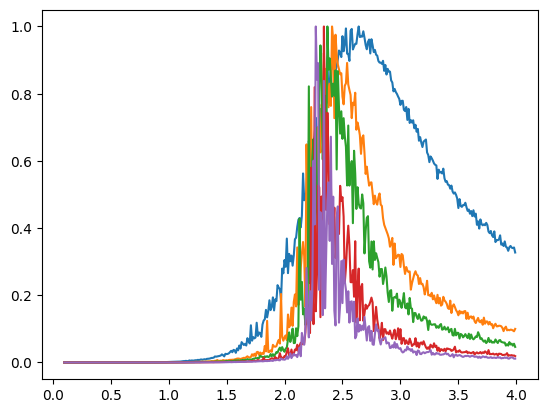

In [337]:
plt.plot(tempRange, [x/max(sus6Arr) for x in sus6Arr])
plt.plot(tempRange, [x/max(sus12Arr) for x in sus12Arr])
plt.plot(tempRange, [x/max(sus16Arr) for x in sus16Arr])
plt.plot(tempRange, [x/max(sus24Arr) for x in sus24Arr])
plt.plot(tempRange, [x/max(sus32Arr) for x in sus32Arr])

In [322]:
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

In [330]:
avgsus6Arr = movingaverage(sus6Arr, 10)
avgsus12Arr = movingaverage(sus12Arr, 10)
avgsus16Arr = movingaverage(sus16Arr, 10)
avgsus24Arr = movingaverage(sus24Arr, 10)
avgsus32Arr = movingaverage(sus32Arr, 10)

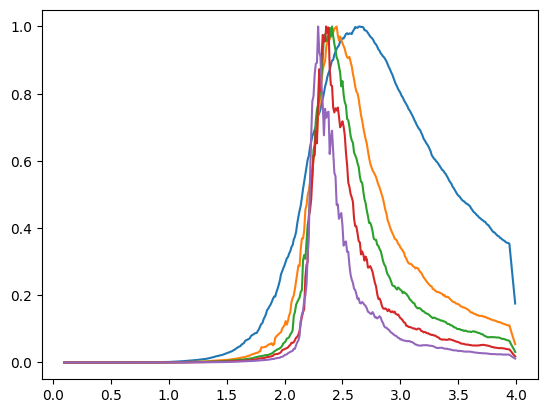

In [336]:
plt.plot(tempRange, [x/max(avgsus6Arr) for x in avgsus6Arr])
plt.plot(tempRange, [x/max(avgsus12Arr) for x in avgsus12Arr])
plt.plot(tempRange, [x/max(avgsus16Arr) for x in avgsus16Arr])
plt.plot(tempRange, [x/max(avgsus24Arr) for x in avgsus24Arr])
plt.plot(tempRange, [x/max(avgsus32Arr) for x in avgsus32Arr])

Text(0.5, 1.0, 'Pseudocritical Temperature vs Inverse Lattice Size')

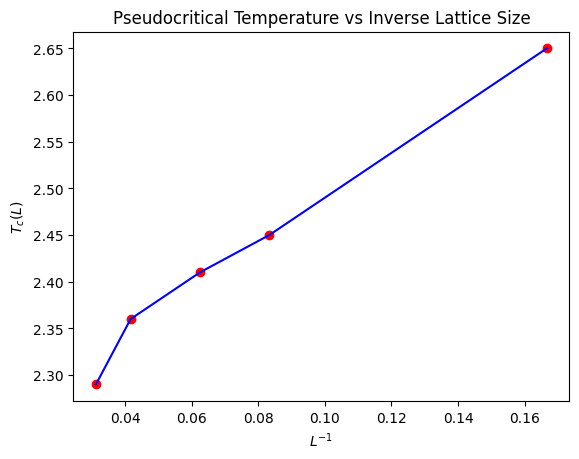

In [353]:
maxSusArr =[]
maxSus6 = tempRange[np.where(avgsus6Arr == max(avgsus6Arr))][0]
maxSus12 = tempRange[np.where(avgsus12Arr == max(avgsus12Arr))][0]
maxSus16 = tempRange[np.where(avgsus16Arr == max(avgsus16Arr))][0]
maxSus24 = tempRange[np.where(avgsus24Arr == max(avgsus24Arr))][0]
maxSus32 = tempRange[np.where(avgsus32Arr == max(avgsus32Arr))][0]
maxSusArr.append(maxSus6)
maxSusArr.append(maxSus12)
maxSusArr.append(maxSus16)
maxSusArr.append(maxSus24)
maxSusArr.append(maxSus32)
maxSusArr
plt.plot([1/6,1/12,1/16,1/24,1/32],maxSusArr,color="blue")
plt.scatter([1/6,1/12,1/16,1/24,1/32],maxSusArr,color="red")
plt.xlabel("$L^{-1}$")
plt.ylabel("$T_c(L)$")
plt.title("Pseudocritical Temperature vs Inverse Lattice Size")

In [309]:
f = interpolate.interp1d(tempRange, sus32Arr)

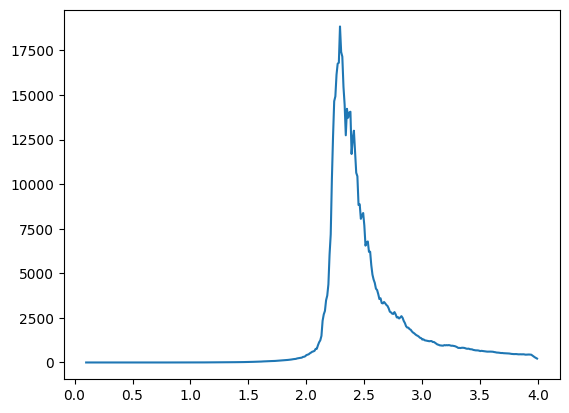

In [329]:
plt.plot(tempRange, ma_vec)

In [308]:
count = 0
avgWindow = []
for sus in sus32Arr:
    if(count % 10 == 0):
        np.average(avgWindow)
        avgWindow = []
    avgWindow.append(sus)
    
    

[371.90104113337367,
 371.35206495521595,
 459.90583470150693,
 500.41456523983027,
 480.743217737951,
 383.9176489453364,
 372.96634494493367,
 488.6041890115041,
 435.72783221107545,
 494.71063114251535,
 427.98026633758764,
 429.05160594375826,
 395.0239836808749,
 494.2279926311161,
 456.8726006818418,
 530.3029520396615,
 443.4355083451949,
 442.3252013596862,
 477.31940608283264,
 460.3519480420675,
 437.0137175529888,
 514.6726243967915,
 464.9281458316572,
 458.5570069737429,
 468.78164250210597,
 572.0387803093654,
 507.07221497106957,
 556.5700584200829,
 589.9355368477347,
 488.16615668107505,
 445.6923163373384,
 567.7068932799103,
 451.3075086586709,
 566.429651314284,
 571.1065018473347,
 546.1256779265772,
 607.8823770321466,
 654.345879694281,
 617.7737386163315,
 553.9785289869443,
 614.8431158768259,
 655.7160117762281,
 619.4722782563741,
 638.7698865882697,
 584.3911174860698,
 536.3724818210783,
 590.7911030555326,
 664.4197496885354,
 720.1837769047413,
 679.95854